In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import numpy as np

#data path 수정
os.chdir("C:\\Users\\Owner2\\Desktop\\G팔로미_vuno")
os.getcwd()

'C:\\Users\\Owner2\\Desktop\\G팔로미_vuno'

In [2]:
X=np.load('X_val_with_callback.npy')
y=np.load('y_val_with_callback.npy')

In [3]:
# import os
# import pandas as pd
# from matplotlib import pyplot as plt
# import numpy as np
# import cv2

# #data path 수정
# os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data\\model")
# os.getcwd()

In [4]:
def f1score(precision, recall):
    _f1score = ( 2 * recall * precision) / (recall + precision)
    
    # return a single tensor value
    return _f1score

In [5]:
from keras import layers, models
from keras.models import load_model
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def model_load(model):
    model = load_model(model,compile=False)
    model.compile(loss='categorical_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4), 
            metrics=['acc',tf.keras.metrics.AUC(),
                      tf.keras.metrics.Precision(),
                      tf.keras.metrics.Recall(),f1score])
    
    return model

Using TensorFlow backend.


In [9]:
import glob
  
    
file_list = glob.glob('./G_팔로미_models/*.hdf5')
print(file_list)

['./G_팔로미_models\\Inception v3_1.hdf5', './G_팔로미_models\\Inception v3_fine tuning_2(631).hdf5', './G_팔로미_models\\ResNet_1.hdf5', './G_팔로미_models\\ResNet_fine_tuning_2(513).hdf5', './G_팔로미_models\\VGG16_2.hdf5', './G_팔로미_models\\VGG16_fine_tuning_3(669).hdf5']


In [11]:
    model=model_load(i)
    _loss, _acc, _auc, _precision, _recall, _f1score = model.evaluate(X, y, batch_size=32)
    print('model name :',i)
    print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

716/716 [==============================] - 8s 11ms/step
model name : ./G_팔로미_models\Inception v3_1.hdf5
loss: 1.026, accuracy: 0.525, auc: 0.808, precision: 0.619, recall: 0.403, f1score: 0.146
716/716 [==============================] - 4s 6ms/step
model name : ./G_팔로미_models\Inception v3_fine tuning_2(631).hdf5
loss: 0.861, accuracy: 0.631, auc: 0.873, precision: 0.693, recall: 0.582, f1score: 0.165
716/716 [==============================] - 5s 6ms/step
model name : ./G_팔로미_models\ResNet_1.hdf5
loss: 1.431, accuracy: 0.413, auc: 0.722, precision: 0.474, recall: 0.354, f1score: 0.129


In [12]:
for i in file_list[3:]:
    model=model_load(i)
    _loss, _acc, _auc, _precision, _recall, _f1score = model.evaluate(X, y, batch_size=32)
    print('model name :',i)
    print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

716/716 [==============================] - 4s 5ms/step
model name : ./G_팔로미_models\ResNet_fine_tuning_2(513).hdf5
loss: 1.134, accuracy: 0.513, auc: 0.768, precision: 0.669, recall: 0.322, f1score: 0.136
716/716 [==============================] - 4s 5ms/step
model name : ./G_팔로미_models\VGG16_2.hdf5
loss: 1.013, accuracy: 0.539, auc: 0.810, precision: 0.602, recall: 0.393, f1score: 0.148
716/716 [==============================] - 2s 3ms/step
model name : ./G_팔로미_models\VGG16_fine_tuning_3(669).hdf5
loss: 0.775, accuracy: 0.665, auc: 0.883, precision: 0.674, recall: 0.589, f1score: 0.174


In [43]:
predict_proba = model.predict(X)
predict = np.argmax(predict_proba,axis=1)

y_label=np.argmax(y,axis=1)
#calc_benign, calc_malignant, mass_benign, mass_malignant

In [44]:
from sklearn.metrics import confusion_matrix

matrix =confusion_matrix(y_label, predict)

matrix

array([[189,  23,  18,  12],
       [ 64,  55,  10,   9],
       [ 14,   5, 104,  45],
       [ 18,   3,  43, 104]], dtype=int64)

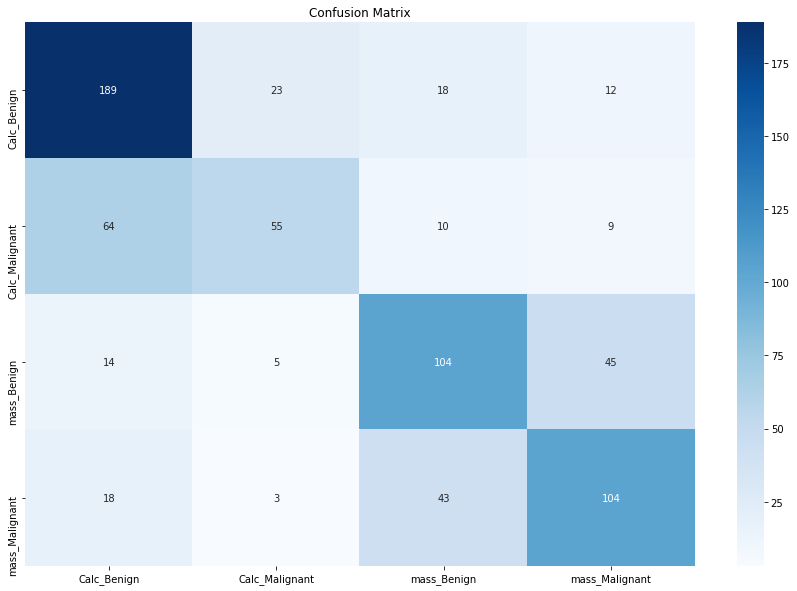

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


index = ['Calc_Benign','Calc_Malignant','mass_Benign','mass_Malignant']  
columns = ['Calc_Benign','Calc_Malignant','mass_Benign','mass_Malignant']  
cm_df = pd.DataFrame(matrix,columns,index)                      
plt.figure(figsize=(15,10)) 
plt.title("Confusion Matrix")
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')

In [56]:
#AUC 출력하기
from sklearn.metrics import roc_curve, roc_auc_score, auc

roc_auc_score(y, predict_proba)

0.8712540995074926

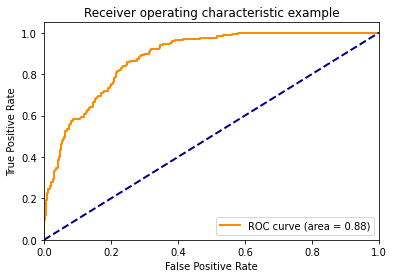

In [58]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], predict_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()